In [1]:
import pandas as pd
import numpy as np

In [2]:
pd.set_option('display.max_columns', None)
#pd.reset_option('display.max_columns')

In [3]:
myresults=pd.read_pickle('data/match_predictions.pkl')

In [4]:
myresults=myresults.reset_index(drop=True)

I will focus on comparing my probablities to bet365's for now. I will drop the other betting columns

In [5]:
myresults.drop(columns=['MaxH', 'AvgH' , 'MaxD', 'AvgD', 'MaxA', 'AvgA'], inplace=True)

In [6]:
# Convert odds to probabilities
myresults['prob_H'] = 1 / myresults['B365H']
myresults['prob_D'] = 1 / myresults['B365D']
myresults['prob_A'] = 1 / myresults['B365A']

# Normalize probabilities to sum to 1
myresults['total_prob'] = myresults['prob_H'] + myresults['prob_D'] + myresults['prob_A']
myresults['prob_H'] /= myresults['total_prob']
myresults['prob_D'] /= myresults['total_prob']
myresults['prob_A'] /= myresults['total_prob']

In [7]:
# Parameters
bet_amount = 10
iterations = 10000

In [8]:
%%time 

# Simulate betting for multiple iterations
profits = []



for _ in range(iterations):
    total_profit = 0
    for index, row in myresults.iterrows():
        # Randomly choose an outcome based on the probabilities
        bet_outcome = np.random.choice(['H', 'D', 'A'], p=[row['prob_H'], row['prob_D'], row['prob_A']])
        
        # Determine the odds based on the bet chosen
        if bet_outcome == 'H':
            odds = row['B365H']
        elif bet_outcome == 'D':
            odds = row['B365D']
        else:
            odds = row['B365A']

        # Check if the bet was correct (compare with actual result)
        actual_result = row['FTR']
        if bet_outcome == actual_result:
            total_profit += bet_amount * (odds - 1)  # Win, add profit (odds - 1) * bet_amount
        else:
            total_profit -= bet_amount  # Loss, subtract bet amount

    profits.append(total_profit)

# Convert profits to numpy array for easy analysis
profits = np.array(profits)

CPU times: user 6min 21s, sys: 5.27 s, total: 6min 27s
Wall time: 6min 17s


In [9]:
profits

array([-150.3,  -80.6, -119.4, ..., -195.4, -118.3, -285.6])

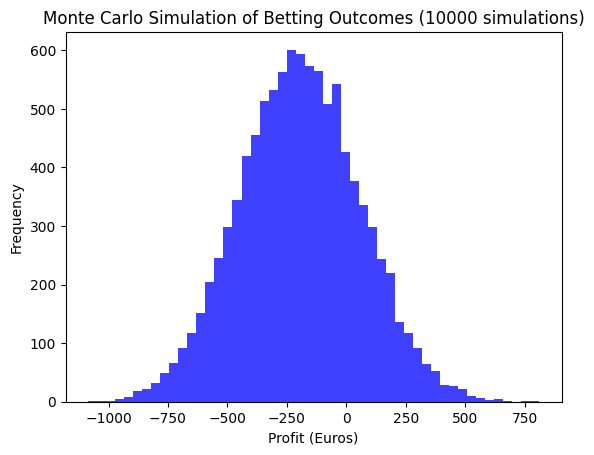

In [10]:
# Plot histogram of simulated profits
import matplotlib.pyplot as plt

plt.hist(profits, bins=50, alpha=0.75, color='blue')
plt.title(f'Monte Carlo Simulation of Betting Outcomes ({iterations} simulations)')
plt.xlabel('Profit (Euros)')
plt.ylabel('Frequency')
plt.show()


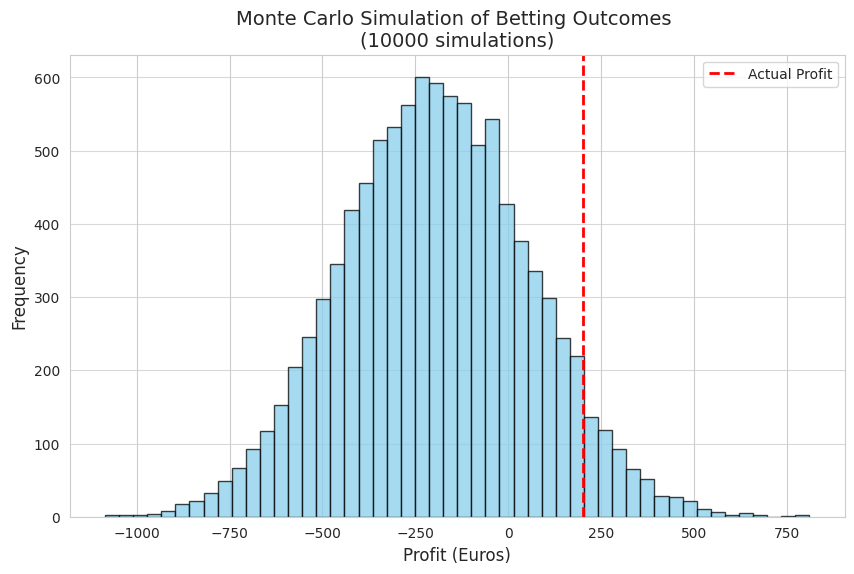

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style
sns.set_style("whitegrid")

# Plot histogram of simulated profits
plt.figure(figsize=(10, 6))
plt.hist(profits, bins=50, alpha=0.75, color='skyblue', edgecolor='black')
plt.title(f'Monte Carlo Simulation of Betting Outcomes \n({iterations} simulations)', fontsize=14)
plt.xlabel('Profit (Euros)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', alpha=0.75)

# Add marker for actual profit
plt.axvline(x=201, color='red', linestyle='--', linewidth=2, label='Actual Profit') 

plt.legend() # Show legend

plt.show()

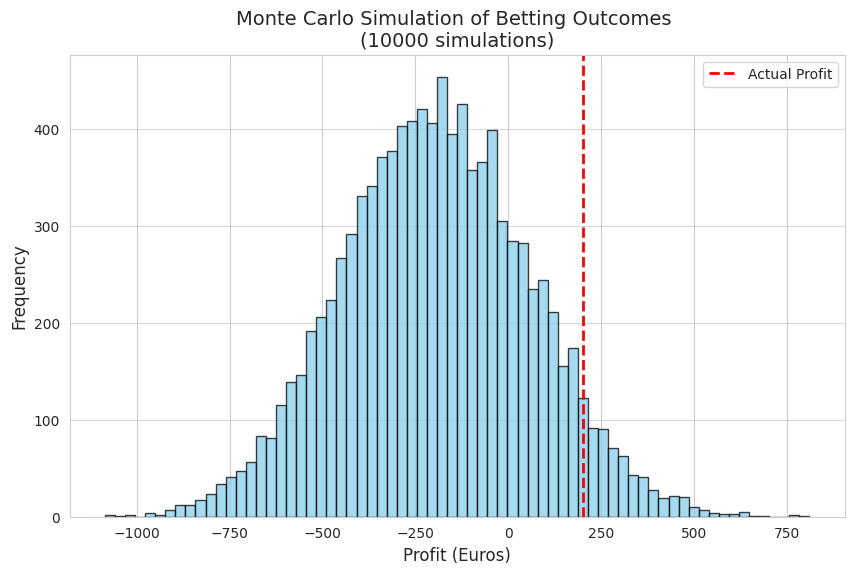

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style
sns.set_style("whitegrid")

# Plot histogram of simulated profits
plt.figure(figsize=(10, 6))
plt.hist(profits, bins=70, alpha=0.75, color='skyblue', edgecolor='black')
plt.title(f'Monte Carlo Simulation of Betting Outcomes \n({iterations} simulations)', fontsize=14)
plt.xlabel('Profit (Euros)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', alpha=0.75)

# Add marker for actual profit
plt.axvline(x=201, color='red', linestyle='--', linewidth=2, label='Actual Profit') 

plt.legend() # Show legend

plt.show()

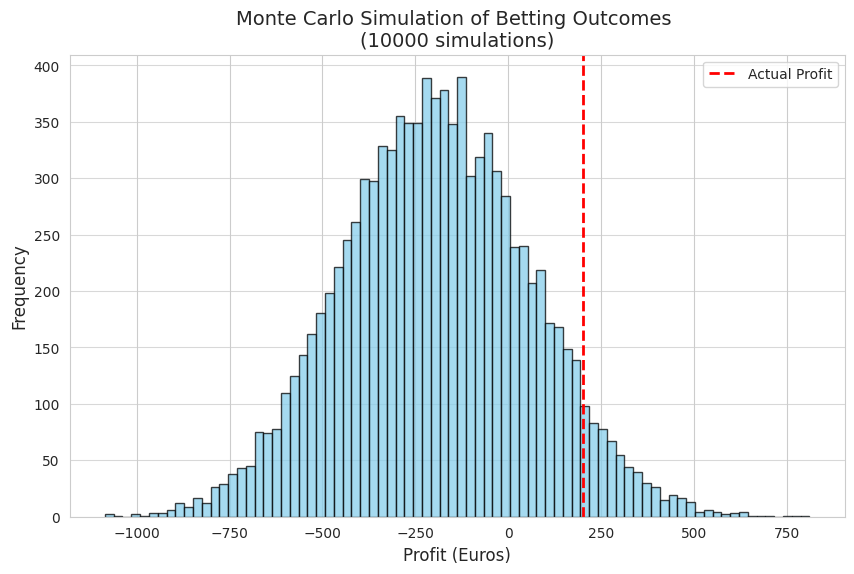

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style
sns.set_style("whitegrid")

# Plot histogram of simulated profits
plt.figure(figsize=(10, 6))
plt.hist(profits, bins=80, alpha=0.75, color='skyblue', edgecolor='black')
plt.title(f'Monte Carlo Simulation of Betting Outcomes \n({iterations} simulations)', fontsize=14)
plt.xlabel('Profit (Euros)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', alpha=0.75)

# Add marker for actual profit
plt.axvline(x=201, color='red', linestyle='--', linewidth=2, label='Actual Profit') 

plt.legend() # Show legend

plt.show()

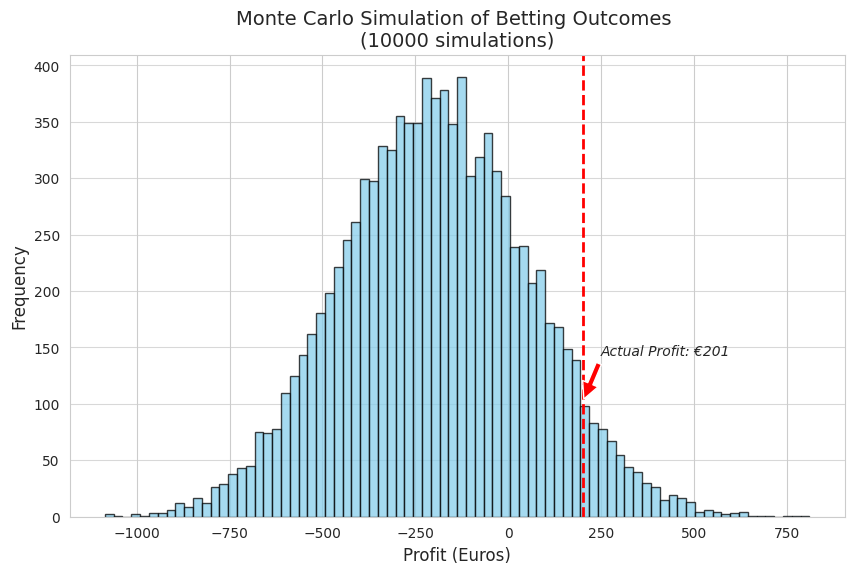

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style
sns.set_style("whitegrid")

# Plot histogram of simulated profits
plt.figure(figsize=(10, 6))
plt.hist(profits, bins=80, alpha=0.75, color='skyblue', edgecolor='black')
plt.title(f'Monte Carlo Simulation of Betting Outcomes \n({iterations} simulations)', fontsize=14)
plt.xlabel('Profit (Euros)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', alpha=0.75)

# Add marker for actual profit with an arrow annotation and italic Euro symbol
plt.axvline(x=201, color='red', linestyle='--', linewidth=2)
plt.annotate(f'Actual Profit: \u20AC201', xy=(201, plt.ylim()[1]*0.25), xytext=(250, plt.ylim()[1]*0.35),
             arrowprops=dict(facecolor='red', shrink=0.05), fontsize=10, 
             style='italic')  # Make the text italic

plt.show()

In [11]:
# Create the 'betWinnings' column
myresults['betWinnings'] = np.where(
    myresults['predictions'] == myresults['FTR'],  # Check if the prediction matches the actual result
    myresults.apply(
        lambda row: 10 * row[f"B365{row['FTR']}"] , axis=1  # Multiply by the corresponding odds column
    ),
    0  # If prediction is incorrect, winnings are 0
)

In [12]:
total_stake=380*10

In [13]:
myresults['betWinnings'].sum()-total_stake

201.0

In [14]:
myresults['betWinnings'].sum()

4001.0

In [15]:
myresults['betWinnings'].sum()-total_stake

201.0

In [28]:
# Calculate p-value (proportion of simulated profits greater than or equal to actual profit)
actual_profit = myresults['betWinnings'].sum()-total_stake# Assume this is your actual profit (replace with your value)
p_value = np.mean(profits >= actual_profit)
print(f"p-value: {p_value:.4f}")



p-value: 0.0583


In [18]:

# Calculate the 95% confidence interval
confidence_interval = np.percentile(profits, [2.5, 97.5]) 

print("95% Confidence Interval:", confidence_interval)

95% Confidence Interval: [-682.305  303.205]


In [22]:

# Calculate the 95% one-sided confidence interval (upper bound)
upper_bound = np.percentile(profits, 95)  

print("95% Confidence Interval (Upper Bound):", upper_bound)

95% Confidence Interval (Upper Bound): 222.705


In [25]:
np.mean(profits)

-194.66461999999999